In [1]:

!pip install pyqt5

!pip install -U pip setuptools wheel

!pip install pandas
!pip install scikit-learn
!pip install nltk

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.1 MB 1.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 1.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.1 MB 2.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/2.1 MB 2.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.1 MB 3.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.1 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.5/2.1 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 2.0/2.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 3.8 MB/s eta 0:00:01
   -----------------------

ERROR: To modify pip, please run the following command:
C:\Users\luciana.angrisano\Anaconda3\python.exe -m pip install -U pip setuptools wheel


In [2]:
!pip install wordcloud


In [3]:
import pandas as pd
import re
import nltk
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

import matplotlib.pyplot as plt

C:\Users\luciana.angrisano\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\luciana.angrisano\AppData\Local\Temp\ipykernel_18976\1351852567.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luciana.angrisano\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\l

In [4]:
#monta o Google Drive para acesso pelo Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Cria objeto com o caminho da pasta do Projeto
from pathlib import Path
#pasta_projeto = Path('/content/drive/MyDrive/AGU_Notebooks/Labs R2D2/')
pasta_projeto = Path(Path.cwd())


In [6]:
!pip install pyarrow
!pip install fastparquet



In [7]:
#dados = pd.read_parquet('processos.parquet')
dados = pd.read_parquet(pasta_projeto /'processos-PRU1.parquet')
#dados = dados.sample(n=100, random_state=42)
dados

,DateTime,cnj,tribunal,orgao,classe,tipo,relevancia,setor,coordenacao,peticaoInicial
0,2023-10-29 22:25:41.347758,10437601020204013300,TRF1,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,,COREJEFNG,COREJEF,\n \n \nEXCELENTÍSSIMO (A) SENHOR (A) DOU...
1,2023-10-29 22:25:41.507670,10028658120234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
2,2023-10-29 22:25:41.675046,10028363120234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
3,2023-10-29 22:25:41.824430,10028622920234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
4,2023-10-29 22:25:41.990944,10030355320234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
...,...,...,...,...,...,...,...,...,...,...
35646,2023-10-30 00:27:11.702150,10592721920234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CRNNE,CRN,\n \n1 \nEXCELENTÍSSIMO DOUTOR JUIZ FEDERAL ...
35647,2023-10-30 00:27:11.931236,10599157420234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CORESEAP,CORESE,\n1 \n \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ F...
35648,2023-10-30 00:27:12.148494,10638251220234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CORESEAP,CORESE,\n \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERA...
35649,2023-10-30 00:27:12.378460,10631903120234013400,TRF1,22ª VARA FEDERAL CÍVEL DA SJDF,PROCEDIMENTO COMUM CÍVEL,DANO MORAL - DDT (DICLORO-DIFENIL-TRICLOROETANO),,NAPECORESE,CORESE,\n \n \n \nEXCELENTÍSSIMO SENHOR JUIZ FEDERAL...


In [8]:
dfpeticao = dados['peticaoInicial']
print(dfpeticao)

0          \n  \n   \nEXCELENTÍSSIMO (A) SENHOR (A) DOU...
1         \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
2         \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
3         \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
4         \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...
                               ...                        
35646     \n \n1  \nEXCELENTÍSSIMO DOUTOR JUIZ FEDERAL ...
35647     \n1 \n  \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ F...
35648     \n \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERA...
35649     \n \n \n \nEXCELENTÍSSIMO SENHOR JUIZ FEDERAL...
35650    Adailton da Rocha Teixeira                    ...
Name: peticaoInicial, Length: 35651, dtype: object


In [9]:
txt = dfpeticao.iloc[1]
txt

' \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL DA SEÇÃO JUDICIÁRIA DO \nESTADO DE GOIÁS.  \n \n DISTRIBUIÇÃO POR DEPENDÊNCIA  \n \n \nProcesso  de origem  nº 0039782 -39.2011.4.01.3500  \nExequente:  LUIZ DE FREITAS PEREIRA  \nExecutado:  FUNASA – FUNDAÇÃO NACIONAL DA SAÚDE  \n \n \n \n \n \n \n \n \n \n \n \n \nLUIZ DE FREITAS PEREIRA , brasileir o, casado , agente de \nsaúde pública, inscrito  no CPF nº  206.080.206 -72, RG nº 352102 , residente e \ndomiciliad o na Rua Joaquim Sampaio , Qd. 01, Lt.02, N °300,  CEP: 76190 -000 \npor meio de seu s procurador es infra-assinado s, vem, à presença de Vossa \nExcelência, requerer  \nCUMPRIMENTO DE EXECUÇÃO JUDICIAL  \npelos motivos a seguir expostos:  \n \n  \n \nI – BREVE SÍNTESE PROCESSUAL  \n \n Trata -se de uma ação coletiva nº 0039782 -39.2011.4.01.3500  \npromovida pelo SINTSEP – SINDICATO DOS TRABALHADORES NO \nSERVIÇO PÚBLICO FEDERAL NO ESTADO DE GOIÁS  em fase de \ncumprimento de sentença, onde os servidores /substituídos  obtiver

In [10]:
def remover_url(txt):
    words = ''
    regexp1 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    regexp2 = re.compile('www?.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    
    
    urls = regexp1.findall(txt)

    for u in urls:
        txt = txt.replace(u, ' ')

    urls = regexp2.findall(txt)

    for u in urls:
        txt = txt.replace(u, ' ')
        
        
    return txt

In [11]:
def remover_caract(txt):
    return re.sub(r"[^0-9a-zA-ZáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ\n ]","",txt)

In [12]:
txt = remover_url(txt)
txt

' \n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL DA SEÇÃO JUDICIÁRIA DO \nESTADO DE GOIÁS.  \n \n DISTRIBUIÇÃO POR DEPENDÊNCIA  \n \n \nProcesso  de origem  nº 0039782 -39.2011.4.01.3500  \nExequente:  LUIZ DE FREITAS PEREIRA  \nExecutado:  FUNASA – FUNDAÇÃO NACIONAL DA SAÚDE  \n \n \n \n \n \n \n \n \n \n \n \n \nLUIZ DE FREITAS PEREIRA , brasileir o, casado , agente de \nsaúde pública, inscrito  no CPF nº  206.080.206 -72, RG nº 352102 , residente e \ndomiciliad o na Rua Joaquim Sampaio , Qd. 01, Lt.02, N °300,  CEP: 76190 -000 \npor meio de seu s procurador es infra-assinado s, vem, à presença de Vossa \nExcelência, requerer  \nCUMPRIMENTO DE EXECUÇÃO JUDICIAL  \npelos motivos a seguir expostos:  \n \n  \n \nI – BREVE SÍNTESE PROCESSUAL  \n \n Trata -se de uma ação coletiva nº 0039782 -39.2011.4.01.3500  \npromovida pelo SINTSEP – SINDICATO DOS TRABALHADORES NO \nSERVIÇO PÚBLICO FEDERAL NO ESTADO DE GOIÁS  em fase de \ncumprimento de sentença, onde os servidores /substituídos  obtiver

In [13]:
txt = remover_caract(txt)
txt

' \n \nAO MERITÍSSIMO JUÍZO DA 1 VARA FEDERAL DA SEÇÃO JUDICIÁRIA DO \nESTADO DE GOIÁS  \n \n DISTRIBUIÇÃO POR DEPENDÊNCIA  \n \n \nProcesso  de origem  n 0039782 3920114013500  \nExequente  LUIZ DE FREITAS PEREIRA  \nExecutado  FUNASA  FUNDAÇÃO NACIONAL DA SAÚDE  \n \n \n \n \n \n \n \n \n \n \n \n \nLUIZ DE FREITAS PEREIRA  brasileir o casado  agente de \nsaúde pública inscrito  no CPF n  206080206 72 RG n 352102  residente e \ndomiciliad o na Rua Joaquim Sampaio  Qd 01 Lt02 N 300  CEP 76190 000 \npor meio de seu s procurador es infraassinado s vem  presença de Vossa \nExcelência requerer  \nCUMPRIMENTO DE EXECUÇÃO JUDICIAL  \npelos motivos a seguir expostos  \n \n  \n \nI  BREVE SÍNTESE PROCESSUAL  \n \n Trata se de uma ação coletiva n 0039782 3920114013500  \npromovida pelo SINTSEP  SINDICATO DOS TRABALHADORES NO \nSERVIÇO PÚBLICO FEDERAL NO ESTADO DE GOIÁS  em fase de \ncumprimento de sentença onde os servidores substituídos  obtiveram êxito na \ndiscussão de diferenças salariais 

# Tokenize essa função serve para quebrarmos nosso texto por palavras, criando desse modo um array com todas as palavras contidas dentro do texto. Por exemplo, "Eu gosto de Correr" → ["eu","gosto","de","correr"]

In [14]:
def tokenize(sentence):
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)
    return sentence

In [15]:
tokenize(txt)

['ao',
 'meritíssimo',
 'juízo',
 'da',
 '1',
 'vara',
 'federal',
 'da',
 'seção',
 'judiciária',
 'do',
 'estado',
 'de',
 'goiás',
 'distribuição',
 'por',
 'dependência',
 'processo',
 'de',
 'origem',
 'n',
 '0039782',
 '3920114013500',
 'exequente',
 'luiz',
 'de',
 'freitas',
 'pereira',
 'executado',
 'funasa',
 'fundação',
 'nacional',
 'da',
 'saúde',
 'luiz',
 'de',
 'freitas',
 'pereira',
 'brasileir',
 'o',
 'casado',
 'agente',
 'de',
 'saúde',
 'pública',
 'inscrito',
 'no',
 'cpf',
 'n',
 '206080206',
 '72',
 'rg',
 'n',
 '352102',
 'residente',
 'e',
 'domiciliad',
 'o',
 'na',
 'rua',
 'joaquim',
 'sampaio',
 'qd',
 '01',
 'lt02',
 'n',
 '300',
 'cep',
 '76190',
 '000',
 'por',
 'meio',
 'de',
 'seu',
 's',
 'procurador',
 'es',
 'infraassinado',
 's',
 'vem',
 'presença',
 'de',
 'vossa',
 'excelência',
 'requerer',
 'cumprimento',
 'de',
 'execução',
 'judicial',
 'pelos',
 'motivos',
 'a',
 'seguir',
 'expostos',
 'i',
 'breve',
 'síntese',
 'processual',
 'trata',

#Stemming essa função serve para diminuirmos a palavra até a sua raiz/base, pois assim, conseguimos tratar as palavras originais e suas respectivas derivações de uma mesma maneira. Exemplo: As palavras Correr e Corrida quando submetidas à nossa função de Stemming, ambas as palavras serão diminuídas até a base Corr. Desse modo , se adicionarmos essa função ao algorítimo, nosso Chatbot não ficará preso à palavras especificas, ele também será capaz de reconhecer derivações ainda não conhecida de palavras bases que ele já aprendeu.
add Codeadd Markdown

In [16]:
def stem(tokens):
    stemmer = nltk.stem.RSLPStemmer()
    new_tokens = []
    for word in tokens:
        word = str(stemmer.stem(word.lower()))
        new_tokens.append(word)
    return new_tokens

#é necessário rodar a função RSLPS em uma lista 

#Stem(txt)

In [17]:
import unicodedata
def remover_acento(txt):
    return unicodedata.normalize('NFD', txt).encode('ascii', errors='ignore').decode('utf-8')

In [18]:
#baixa a lista de stopwords em pt
stopwords_pt = nltk.corpus.stopwords.words('portuguese')

#remove palavras que podem ser úteis da lista de stopwords
# remove 'nao' e 'nem' da lista -> são palavras importantes
# ->mudam totalmente o sentido da frase
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

#inclui palavras na lista de stopwords
stopword_list = []

stopword_list.append('do')
stopword_list.append('da')
stopword_list.append('de')
stopword_list.append('em')
stopword_list.append('cpf')
stopword_list.append('rg')
stopword_list.append('excelentissimo')
stopword_list.append('excelentissimoa')
stopword_list.append('excelentissima')
stopword_list.append('meritissimo')
stopword_list.append('exmo')
stopword_list.append('exma')
stopword_list.append('sr')
stopword_list.append('sra')
stopword_list.append('senhor')
stopword_list.append('senhora')
stopword_list.append('doutor')
stopword_list.append('doutora')
stopword_list.append('juiz')
stopword_list.append('juiza')
stopword_list.append('federal')
stopword_list.append('bairro')
stopword_list.append('cep')
stopword_list.append('rua')
stopword_list.append('br')
stopword_list.append('e')
stopword_list.append('número')
stopword_list.append('n')
stopword_list.append('r')
stopword_list.append('petição')
stopword_list.append('vou')
stopword_list.append('nos')
stopword_list.append('que')
stopword_list.append('tao')
stopword_list.append('ja')
stopword_list.append('ai')
stopword_list.append('.')
stopword_list.append('%')
stopword_list.append('ainda')
stopword_list.append('«')
stopword_list.append('➔')
stopword_list.append('»')
stopword_list.append('-')


In [19]:
# junta todas as stopwords
stopword_list.extend(stopwords_pt)

# remove duplicatas
stopword_list = list(set(stopword_list))

#remove os acentos das stopwords
stopword_list = [remover_acento(w) for w in stopword_list]

In [20]:
# junta todas as stopwords
stopword_list.extend(stopwords_pt)

# remove duplicatas
stopword_list = list(set(stopword_list))

#remove os acentos das stopwords
stopword_list = [remover_acento(w) for w in stopword_list]

In [21]:
palavras = tokenize(txt)
palavras = [remover_acento(w) for w in palavras]
palavras

['ao',
 'meritissimo',
 'juizo',
 'da',
 '1',
 'vara',
 'federal',
 'da',
 'secao',
 'judiciaria',
 'do',
 'estado',
 'de',
 'goias',
 'distribuicao',
 'por',
 'dependencia',
 'processo',
 'de',
 'origem',
 'n',
 '0039782',
 '3920114013500',
 'exequente',
 'luiz',
 'de',
 'freitas',
 'pereira',
 'executado',
 'funasa',
 'fundacao',
 'nacional',
 'da',
 'saude',
 'luiz',
 'de',
 'freitas',
 'pereira',
 'brasileir',
 'o',
 'casado',
 'agente',
 'de',
 'saude',
 'publica',
 'inscrito',
 'no',
 'cpf',
 'n',
 '206080206',
 '72',
 'rg',
 'n',
 '352102',
 'residente',
 'e',
 'domiciliad',
 'o',
 'na',
 'rua',
 'joaquim',
 'sampaio',
 'qd',
 '01',
 'lt02',
 'n',
 '300',
 'cep',
 '76190',
 '000',
 'por',
 'meio',
 'de',
 'seu',
 's',
 'procurador',
 'es',
 'infraassinado',
 's',
 'vem',
 'presenca',
 'de',
 'vossa',
 'excelencia',
 'requerer',
 'cumprimento',
 'de',
 'execucao',
 'judicial',
 'pelos',
 'motivos',
 'a',
 'seguir',
 'expostos',
 'i',
 'breve',
 'sintese',
 'processual',
 'trata',

In [22]:
def remover_stop_words(palavras, stopword_list = stopword_list):
    palavras_novas = []
    for word in palavras:
        if word not in stopword_list:
            palavras_novas.append(word)
    return palavras_novas

In [23]:
remover_stop_words(palavras)
txt_final = remover_stop_words(palavras)
txt_final

['juizo',
 '1',
 'vara',
 'secao',
 'judiciaria',
 'estado',
 'goias',
 'distribuicao',
 'dependencia',
 'processo',
 'origem',
 '0039782',
 '3920114013500',
 'exequente',
 'luiz',
 'freitas',
 'pereira',
 'executado',
 'funasa',
 'fundacao',
 'nacional',
 'saude',
 'luiz',
 'freitas',
 'pereira',
 'brasileir',
 'casado',
 'agente',
 'saude',
 'publica',
 'inscrito',
 '206080206',
 '72',
 '352102',
 'residente',
 'domiciliad',
 'joaquim',
 'sampaio',
 'qd',
 '01',
 'lt02',
 '300',
 '76190',
 '000',
 'meio',
 's',
 'procurador',
 'es',
 'infraassinado',
 's',
 'vem',
 'presenca',
 'vossa',
 'excelencia',
 'requerer',
 'cumprimento',
 'execucao',
 'judicial',
 'motivos',
 'seguir',
 'expostos',
 'i',
 'breve',
 'sintese',
 'processual',
 'trata',
 'acao',
 'coletiva',
 '0039782',
 '3920114013500',
 'promovida',
 'sintsep',
 'sindicato',
 'trabalhadores',
 'servico',
 'publico',
 'estado',
 'goias',
 'fase',
 'cumprimento',
 'sentenca',
 'onde',
 'servidores',
 'substituidos',
 'obtiveram

In [24]:
#Para saber quais palavras são consideradas como stopwords, assim podemos analisar se queremos adicionar ou retirar palavras

print(stopword_list)

['', 'forem', 'na', 'pela', 'br', 'teriamos', 'ha', 'voces', 'houver', 'houveriam', 'por', 'qual', 'tem', 'tiveramos', 'quem', 'teriam', 'cep', 'tivera', 'estava', 'estes', 'terao', 'foram', 'exmo', 'sejam', 'so', 'fossem', 'estivessemos', 'estivemos', 'tinham', 'estiverem', 'estivessem', 'seja', 'sera', 'houveram', 'fora', 'sao', 'isto', 'tu', 'terao', 'seriamos', 'tiver', 'formos', 'um', 'houvera', 'estivera', 'meu', 'nossas', 'excelentissimoa', 'doutora', 'estivermos', 'exma', 'excelentissimo', 'em', 'dela', 'houverao', 'serao', 'nas', 'tenhamos', 'tive', 'estive', 'e', 'juiza', 'so', 'ao', 'serao', 'estamos', 'houveria', 'terei', 'houverao', 'de', 'voce', 'sua', 'eu', 'aquelas', 'estiveramos', 'para', 'ate', 'tuas', 'haja', 'isso', 'teve', 'se', 'houvesse', 'e', 'foramos', 'ele', 'serei', 'que', 'aos', 'sr', 'esteve', 'com', 'aquele', 'sejamos', 'houvemos', 'for', 'pelo', 'houverei', 'estiveramos', 'lhes', 'mas', 'meus', 'do', 'aquela', 'me', 'esta', 'vou', 'estao', 'a', 'meritissi

#Definindo o loop para percorrer todas as petições
nova_dfpeticao = []

for peticao in dfpeticao:
    txt = remover_url(peticao)
    txt = remover_caract(txt)
    txt = tokenize(txt)
    txt = [remover_acento(w) for w in txt]
    txt = remover_stop_words(txt)
    #txt = stem(txt)
    txt = " ".join(txt)
    nova_dfpeticao.append(txt)
    #if i >5 : break
 

print(nova_dfpeticao)

In [25]:
def processar_peticao(texto):
    if isinstance(texto, str):
        texto = remover_url(texto)
        texto = remover_caract(texto)
        texto = tokenize(texto)
        texto = [remover_acento(w) for w in texto]
        texto = remover_stop_words(texto)
        # Outras transformações, como stemming, se necessário
        return " ".join(texto)
    else:
        return texto  # Retorna a entrada original se não for uma string


In [26]:
dados['peticao_processada'] = dados['peticaoInicial'].apply(processar_peticao)

In [27]:
dados

,DateTime,cnj,tribunal,orgao,classe,tipo,relevancia,setor,coordenacao,peticaoInicial,peticao_processada
0,2023-10-29 22:25:41.347758,10437601020204013300,TRF1,2ª RELATORIA DA 3ª TURMA RECURSAL DA SJBA,RECURSO INOMINADO CÍVEL,INDENIZAÇÃO POR DANO AMBIENTAL,,COREJEFNG,COREJEF,\n \n \nEXCELENTÍSSIMO (A) SENHOR (A) DOU...,vara juizados especiais federais secao judicia...
1,2023-10-29 22:25:41.507670,10028658120234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...,juizo 1 vara secao judiciaria estado goias dis...
2,2023-10-29 22:25:41.675046,10028363120234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...,juizo 1 vara secao judiciaria estado goias dis...
3,2023-10-29 22:25:41.824430,10028622920234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...,juizo 1 vara secao judiciaria estado goias dis...
4,2023-10-29 22:25:41.990944,10030355320234013500,TRF1,1ª VARA FEDERAL CÍVEL DA SJGO,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"ÍNDICE DE 3,17%",,CORESENGEX,CORESE,\n \nAO MERITÍSSIMO JUÍZO DA 1ª VARA FEDERAL ...,juizo 1 vara secao judiciaria estado goias dis...
...,...,...,...,...,...,...,...,...,...,...,...
35646,2023-10-30 00:27:11.702150,10592721920234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CRNNE,CRN,\n \n1 \nEXCELENTÍSSIMO DOUTOR JUIZ FEDERAL ...,1 4 vara civel secao judiciaria distrito distr...
35647,2023-10-30 00:27:11.931236,10599157420234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CORESEAP,CORESE,\n1 \n \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ F...,1 4 vara secao judiciaria distrito distribuica...
35648,2023-10-30 00:27:12.148494,10638251220234013400,TRF1,4ª VARA FEDERAL CÍVEL DA SJDF,CUMPRIMENTO DE SENTENÇA DE AÇÕES COLETIVAS,"REAJUSTES DE REMUNERAÇÃO, PROVENTOS OU PENSÃO",,CORESEAP,CORESE,\n \nEXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERA...,vara subsecao judiciaria distrito ref cumprime...
35649,2023-10-30 00:27:12.378460,10631903120234013400,TRF1,22ª VARA FEDERAL CÍVEL DA SJDF,PROCEDIMENTO COMUM CÍVEL,DANO MORAL - DDT (DICLORO-DIFENIL-TRICLOROETANO),,NAPECORESE,CORESE,\n \n \n \nEXCELENTÍSSIMO SENHOR JUIZ FEDERAL...,d vara brasilia secao judiciaria distrito df j...


In [28]:
import pandas as pd
from collections import Counter

# Inicialize um contador personalizado para contar as palavras
word_counter = Counter()

# Percorra cada petição e conte as palavras
for peticao in dados['peticao_processada']:
    # Dividir o texto em palavras usando espaços como delimitadores
    words = peticao.split()
    word_counter.update(words)

# Crie um DataFrame a partir do contador
word_counts_df = pd.DataFrame(word_counter.items(), columns=['Word', 'Count'])

# Ordene o DataFrame pela contagem de forma decrescente
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Selecione as 50 palavras mais frequentes
top_50_words = word_counts_df.head(50)


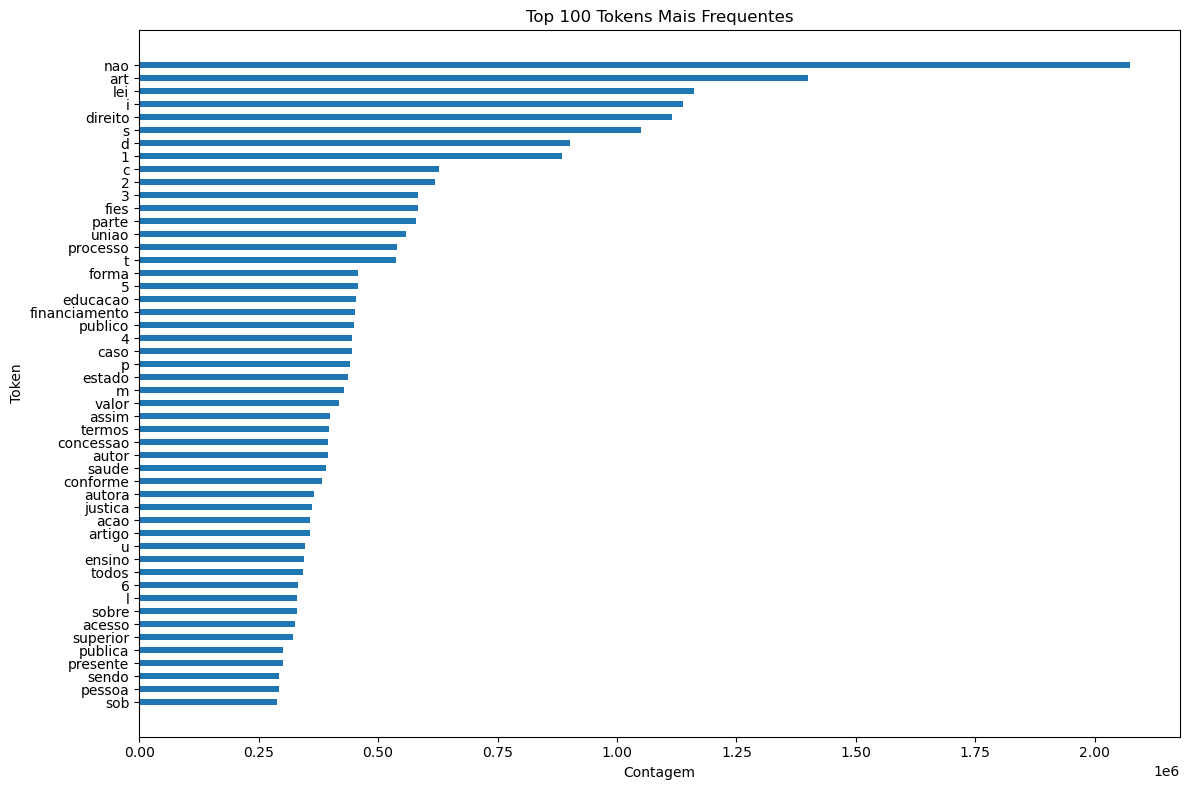

In [31]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com tamanho de figura maior
plt.figure(figsize=(12, 8))  # Aumente o tamanho da figura

# Crie as barras com espaçamento entre elas
plt.barh(top_50_words['Word'], top_50_words['Count'], height=0.4)  # Ajuste o height para controlar o espaçamento entre as barras

plt.xlabel('Contagem')
plt.ylabel('Token')
plt.title('Top 100 Tokens Mais Frequentes')
plt.tight_layout()
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()




In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Converter as palavras em uma única string
sampled_text = ' '.join(top_50_words['Word'])

# Configurar a nuvem de palavras
wordcloud = WordCloud(
    background_color="white",
    width=1600,
    height=800,
    max_words=100  # Limite o número de palavras exibidas
)

# Gerar a nuvem de palavras
wordcloud.generate(sampled_text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Salvar a nuvem de palavras em um arquivo de imagem
wordcloud.to_file("nuvem_de_palavras.png")


In [ ]:
del dados["peticaoInicial"]
#del dados["DateTime","tribunal","relevancia","setor"]
# Lista de colunas a serem excluídas
colunas_para_excluir = ["DateTime", "tribunal", "relevancia", "setor"]

# Use o método drop para excluir as colunas
dados = dados.drop(colunas_para_excluir, axis=1)

dados

In [ ]:
print(dados.shape)

In [ ]:
dados['coordenacao'].value_counts()

In [ ]:
dados.to_parquet(pasta_projeto /'dataset_tratado.parquet')
dados = pd.read_parquet(pasta_projeto /'dataset_tratado.parquet')
dados